Q1

Compute the equilibrium points (if they exist) and the stationary distribution for a birth-death process that models ride sharing. Based on work by Lobel et al.



In [95]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import math

# Constants
arrival_rate = 20000 / (30 * 60) # Riders arriving per minute
city_area = 630 / 30  # this many square kilometers
c = 154 # Number of drivers
speed = 0.1
mean_en_route = 15 # Mean time spent riding from origin to destination
pickup_base = 2*math.sqrt(city_area) # Mean time to do pickup in minutes is pickup_base / sqrt(free drivers)
print('Offered arrival rate of riders per minute =', arrival_rate)
print('Average en_route time in minutes =', mean_en_route)
print('Pickup base in minutes =', pickup_base)
def p(n,c,city_area,speed):
    return 1 - np.exp(-((c - n)/city_area) * np.pi * 7 * 7 * speed * speed)

max_n = c + 1 # Explore number of riders n in system ranging from 0 to this number. Loss system if max_n=c+1
mu = np.zeros(max_n)
l = np.zeros(max_n)
for n in range(max_n):
    mu[n] = np.minimum(n, c) / (mean_en_route + pickup_base / np.amax([1.0, math.sqrt(np.abs(n-c))]))
    l[n] = arrival_rate * p(n,c,city_area,speed)
 

Offered arrival rate of riders per minute = 11.11111111111111
Average en_route time in minutes = 15
Pickup base in minutes = 9.16515138991168


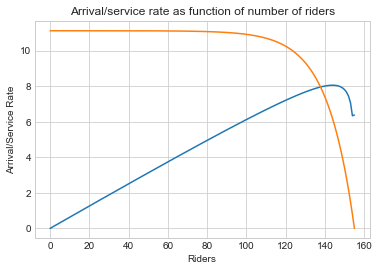

In [96]:
# Explore number of riders in system n ranging from 0 to twice the number of drivers
#fig = plt.figure()
#ax = plt.axes()
plt.figure()
plt.title("Arrival/service rate as function of number of riders")
plt.xlabel("Riders")
plt.ylabel("Arrival/Service Rate")
x_nums= np.linspace(0, max_n, max_n)
plt.plot(x_nums, mu)
plt.plot(x_nums, l)
plt.show()

Compute steady-state distribution

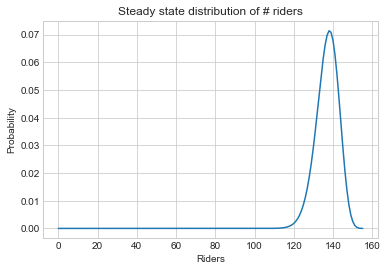

In [97]:
rate_differences = np.abs(arrival_rate - mu)
start_index = np.argmin(rate_differences)
# start_index gives the location of the closest match between arrival and service rates.
# Start the recursion for birth-death processes there and work out to edges.
# Numerically sensible.

pi = np.zeros(max_n) # Vector giving the stationary distribution
pi[start_index] = 1 # Temporary value. We rescale to prob distribution later
for i in range(start_index, max_n-1):
    pi[i+1] = pi[i] * l[i] / mu[i+1]
for i in range(start_index, 0, -1):
    pi[i-1] = pi[i] * mu[i] / l[i-1]
sum_pi = pi.sum()
pi = pi / sum_pi
#print(pi)
plt.plot(x_nums, pi)
plt.title("Steady state distribution of # riders")
plt.xlabel("Riders")
plt.ylabel("Probability")
plt.show()

Compute performance measures

In [98]:
true_arrival_rate = arrival_rate * (1-pi[c]) # After loss
fraction_enroute = true_arrival_rate * mean_en_route / c # fraction of driver time en_route
print(f'Fraction of offered demand served = {1-pi[c]:.3f}')
print('Fraction of driver time spent en_route = %.3f' %fraction_enroute)
print('Total driver time spent en route = %.1f' %(fraction_enroute * c))
busy_drivers = 0
for i in range(max_n):
    busy_drivers += pi[i] * np.minimum(i, c)
fraction_busy = busy_drivers / c
fraction_idle = 1-fraction_busy
fraction_pickup = fraction_busy - fraction_enroute
print('Fraction of driver time spent in pickup = %.3f' %fraction_pickup)
print('Fraction of driver time spent idle = %.3f' %fraction_idle)

# I only know how to compute average pickup time when max_n <= c+1, so it is a loss system.
if max_n <= c+1:
    average_pickup_time = fraction_pickup * c / true_arrival_rate
    print('Average pickup time = %.1f minutes' %average_pickup_time)

Fraction of offered demand served = 1.000
Fraction of driver time spent en_route = 1.082
Total driver time spent en route = 166.7
Fraction of driver time spent in pickup = -0.199
Fraction of driver time spent idle = 0.117
Average pickup time = -2.8 minutes


Q2

Fraction of riders who cancel

In [99]:
fraction_of_calls_not_handled = 1 - 1/arrival_rate * np.dot(pi, l)
print("Fraction of riders who cancel is " + str(fraction_of_calls_not_handled))

Fraction of riders who cancel is 0.2906747207707615


In [102]:
def getlandpi(drivers):
    # Constants
    arrival_rate = 20000 / (30 * 60) # Riders arriving per minute
    city_area = 630 / 30  # this many square kilometers
    c = drivers # Number of drivers
    speed = 0.1
    mean_en_route = 15 # Mean time spent riding from origin to destination
    pickup_base = 2*math.sqrt(city_area) # Mean time to do pickup in minutes is pickup_base / sqrt(free drivers)
    
    def getP(n,c,city_area,speed):
        return 1 - np.exp(-((c - n)/city_area) * np.pi * 7 * 7 * speed * speed)
    
    max_n = c + 1 # Explore number of riders n in system ranging from 0 to this number. Loss system if max_n=c+1
    mu = np.zeros(max_n)
    l = np.zeros(max_n)
    for n in range(max_n):
        mu[n] = np.minimum(n, c) / (mean_en_route + pickup_base / np.amax([1.0, math.sqrt(np.abs(n-c))]))
        l[n] = arrival_rate * getP(n,c,city_area,speed)
    
    rate_differences = np.abs(arrival_rate - mu)
    start_index = np.argmin(rate_differences)
    # start_index gives the location of the closest match between arrival and service rates.
    # Start the recursion for birth-death processes there and work out to edges.
    # Numerically sensible.

    pi = np.zeros(max_n) # Vector giving the stationary distribution
    pi[start_index] = 1 # Temporary value. We rescale to prob distribution later
    for i in range(start_index, max_n-1):
        pi[i+1] = pi[i] * l[i] / mu[i+1]
    for i in range(start_index, 0, -1):
        pi[i-1] = pi[i] * mu[i] / l[i-1]
    sum_pi = pi.sum()
    pi = pi / sum_pi
    return np.sum(l*pi) * mean_en_route / c,np.sum(l*pi) * mean_en_route

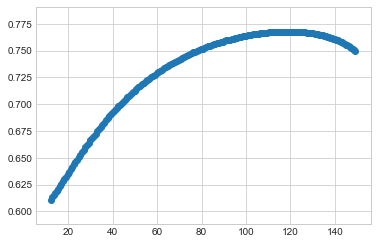

In [103]:
drivers = []
spend_route = []
average_num = []
for i in range(20,200):
    drivers.append(i)
    spend_route.append(getlandpi(i)[0])
    average_num.append(getlandpi(i)[1])
plt.scatter(average_num,spend_route)

Q4

At arrount 120.

Q5

In [104]:
from scipy.stats import gamma
# Constants
arrival_rate = 20000 / (30 * 60) # Riders arriving per minute
city_area = 630 / 30  # this many square kilometers
c = 154 # Number of drivers
speed = 0.1
mean_en_route = 15 # Mean time spent riding from origin to destination
pickup_base = 2*math.sqrt(city_area) # Mean time to do pickup in minutes is pickup_base / sqrt(free drivers)
print('Offered arrival rate of riders per minute =', arrival_rate)
print('Average en_route time in minutes =', mean_en_route)
print('Pickup base in minutes =', pickup_base)
def p(n,c,city_area,speed):
    cancel = np.exp(-((c - n)/city_area) * np.pi * 7 * 7 * speed * speed)
    price = 20 if n <= 140 else 30
    g = gamma.cdf(price,4,15,3)
    return (1 - cancel) * (1 - g)
max_n = c + 1 # Explore number of riders n in system ranging from 0 to this number. Loss system if max_n=c+1
mu = np.zeros(max_n)
l = np.zeros(max_n)
for n in range(max_n):
    mu[n] = np.minimum(n, c) / (mean_en_route + pickup_base / np.amax([1.0, math.sqrt(np.abs(n-c))]))
    l[n] = arrival_rate * p(n,c,city_area,speed)

Offered arrival rate of riders per minute = 11.11111111111111
Average en_route time in minutes = 15
Pickup base in minutes = 9.16515138991168


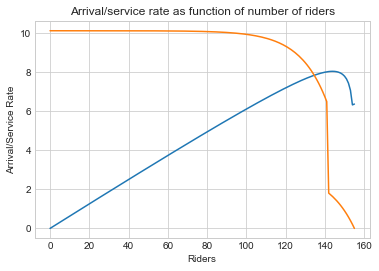

In [105]:
# Explore number of riders in system n ranging from 0 to twice the number of drivers
#fig = plt.figure()
#ax = plt.axes()
plt.figure()
plt.title("Arrival/service rate as function of number of riders")
plt.xlabel("Riders")
plt.ylabel("Arrival/Service Rate")
x_nums= np.linspace(0, max_n, max_n)
plt.plot(x_nums, mu)
plt.plot(x_nums, l)
plt.show()

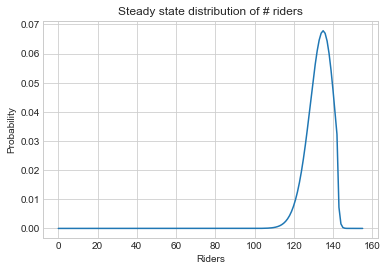

In [106]:
rate_differences = np.abs(arrival_rate - mu)
start_index = np.argmin(rate_differences)
# start_index gives the location of the closest match between arrival and service rates.
# Start the recursion for birth-death processes there and work out to edges.
# Numerically sensible.

pi = np.zeros(max_n) # Vector giving the stationary distribution
pi[start_index] = 1 # Temporary value. We rescale to prob distribution later
for i in range(start_index, max_n-1):
    pi[i+1] = pi[i] * l[i] / mu[i+1]
for i in range(start_index, 0, -1):
    pi[i-1] = pi[i] * mu[i] / l[i-1]
sum_pi = pi.sum()
pi = pi / sum_pi
#print(pi)
plt.plot(x_nums, pi)
plt.title("Steady state distribution of # riders")
plt.xlabel("Riders")
plt.ylabel("Probability")
plt.show()

In [107]:
true_arrival_rate = arrival_rate * (1-pi[c]) # After loss
fraction_enroute = true_arrival_rate * mean_en_route / c # fraction of driver time en_route
print(f'Fraction of offered demand served = {1-pi[c]:.3f}')
print('Fraction of driver time spent en_route = %.3f' %fraction_enroute)
print('Total driver time spent en route = %.1f' %(fraction_enroute * c))
busy_drivers = 0
for i in range(max_n):
    busy_drivers += pi[i] * np.minimum(i, c)
fraction_busy = busy_drivers / c
fraction_idle = 1-fraction_busy
fraction_pickup = fraction_busy - fraction_enroute
print('Fraction of driver time spent in pickup = %.3f' %fraction_pickup)
print('Fraction of driver time spent idle = %.3f' %fraction_idle)

# I only know how to compute average pickup time when max_n <= c+1, so it is a loss system.
if max_n <= c+1:
    average_pickup_time = fraction_pickup * c / true_arrival_rate
    print('Average pickup time = %.1f minutes' %average_pickup_time)

Fraction of offered demand served = 1.000
Fraction of driver time spent en_route = 1.082
Total driver time spent en route = 166.7
Fraction of driver time spent in pickup = -0.225
Fraction of driver time spent idle = 0.143
Average pickup time = -3.1 minutes


In [108]:
fraction_of_calls_not_handled = 1 - 1/arrival_rate * np.dot(pi, l)
print("Fraction of riders who cancel is " + str(fraction_of_calls_not_handled))

Fraction of riders who cancel is 0.3017475649608312


In [109]:
def getlandpi(drivers):
    # Constants
    arrival_rate = 20000 / (30 * 60) / 2 # Riders arriving per minute
    city_area = 630 / 30  # this many square kilometers
    c = drivers # Number of drivers
    speed = 0.1
    mean_en_route = 15 # Mean time spent riding from origin to destination
    pickup_base = 2*math.sqrt(city_area) # Mean time to do pickup in minutes is pickup_base / sqrt(free drivers)
    def p(n,c,city_area,speed):
        cancel = np.exp(-((c - n)/city_area) * np.pi * 7 * 7 * speed * speed)
        price = 20 if n <= 140 else 30
        g = gamma.cdf(price,4,15,3)
        return (1 - cancel) * (1 - g)
    max_n = c + 1 # Explore number of riders n in system ranging from 0 to this number. Loss system if max_n=c+1
    mu = np.zeros(max_n)
    l = np.zeros(max_n)
    for n in range(max_n):
        mu[n] = np.minimum(n, c) / (mean_en_route + pickup_base / np.amax([1.0, math.sqrt(np.abs(n-c))]))
        l[n] = arrival_rate * p(n,c,city_area,speed)
    rate_differences = np.abs(arrival_rate - mu)
    start_index = np.argmin(rate_differences)
    # start_index gives the location of the closest match between arrival and service rates.
    # Start the recursion for birth-death processes there and work out to edges.
    # Numerically sensible.

    pi = np.zeros(max_n) # Vector giving the stationary distribution
    pi[start_index] = 1 # Temporary value. We rescale to prob distribution later
    for i in range(start_index, max_n-1):
        pi[i+1] = pi[i] * l[i] / mu[i+1]
    for i in range(start_index, 0, -1):
        pi[i-1] = pi[i] * mu[i] / l[i-1]
    sum_pi = pi.sum()
    pi = pi / sum_pi
    return np.dot(pi, l) * mean_en_route / c,np.dot(pi, l) * mean_en_route

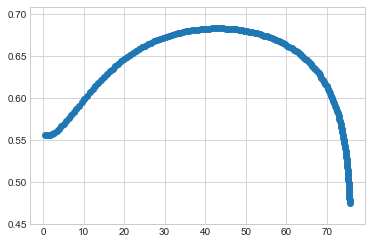

In [110]:
drivers = []
spend_route = []
average_num = []
for i in range(1,160):
    drivers.append(i)
    spend_route.append(getlandpi(i)[0])
    average_num.append(getlandpi(i)[1])
plt.scatter(average_num,spend_route)

In [111]:
revenue = 0
for i in range(max_n):
    price = 20 if i <= 140 else 30
    revenue += pi[i] * l[i] * price
print("The revenue per unit time is " + str(revenue))
print("The revenue per hour is " + str(revenue * 60))

The revenue per unit time is 155.90785925394172
The revenue per hour is 9354.471555236503


Q6

In [113]:
def returnRevenue(p1,n0):
    # Constants
    arrival_rate = 20000 / (30 * 60) # Riders arriving per minute
    city_area = 630 / 30  # this many square kilometers
    c = 154 # Number of drivers
    speed = 0.1
    mean_en_route = 15 # Mean time spent riding from origin to destination
    pickup_base = 2*math.sqrt(city_area) # Mean time to do pickup in minutes is pickup_base / sqrt(free drivers)
    
    def p(n,c,city_area,speed,p1,n0):
        cancel = np.exp(-((c - n)/city_area) * np.pi * 7 * 7 * speed * speed)
        price = 20 if n <= n0 else p1
        g = gamma.cdf(price,4,15,3)
        return (1 - cancel) * (1 - g)
    max_n = c + 1 # Explore number of riders n in system ranging from 0 to this number. Loss system if max_n=c+1
    mu = np.zeros(max_n)
    l = np.zeros(max_n)
    for n in range(max_n):
        mu[n] = np.minimum(n, c) / (mean_en_route + pickup_base / np.amax([1.0, math.sqrt(np.abs(n-c))]))
        l[n] = arrival_rate * p(n,c,city_area,speed,p1,n0)
    rate_differences = np.abs(arrival_rate - mu)
    start_index = np.argmin(rate_differences)
    # start_index gives the location of the closest match between arrival and service rates.
    # Start the recursion for birth-death processes there and work out to edges.
    # Numerically sensible.

    pi = np.zeros(max_n) # Vector giving the stationary distribution
    pi[start_index] = 1 # Temporary value. We rescale to prob distribution later
    for i in range(start_index, max_n-1):
        pi[i+1] = pi[i] * l[i] / mu[i+1]
    for i in range(start_index, 0, -1):
        pi[i-1] = pi[i] * mu[i] / l[i-1]
    sum_pi = pi.sum()
    pi = pi / sum_pi
    revenue = 0
    for i in range(max_n):
        price = 20 if i <= n0 else 100
        revenue += pi[i] * l[i] * price
    return revenue

In [114]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
x = []
y = []
z = []
for i in range(30):
    for j in range(30):
        x.append(i+20)
        y.append(j+120)
        z.append(returnRevenue(i+20,j+120))

Text(0.5, 0, 'Revenue per unit time')

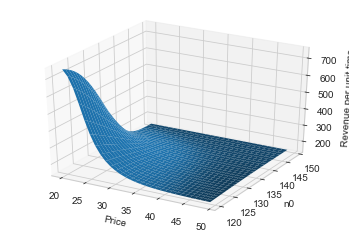

In [115]:
x = np.reshape(x, (30, 30))
y = np.reshape(y, (30, 30))
z = np.reshape(z, (30, 30))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z)

ax.set_xlabel('Price')
ax.set_ylabel('n0')
ax.set_zlabel('Revenue per unit time')